In [1]:
!jupyter kernelspec list

Available kernels:
  fbprophet    C:\Users\BHAVANI\AppData\Roaming\jupyter\kernels\fbprophet
  python3      C:\Users\BHAVANI\.conda\envs\tensorflow\share\jupyter\kernels\python3


In [2]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
#from fbprophet import Prophet

In [3]:
!pip install joblib
import joblib

In [4]:
# load data
df = pd.read_csv('monthly-car-sales.csv')
# summarize shape
df.shape

(108, 2)

In [5]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


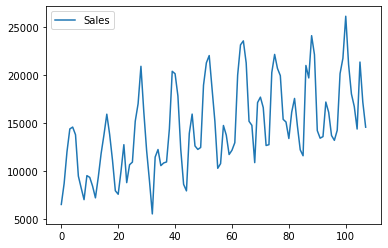

In [6]:
df.plot()
pyplot.show()

In [7]:
!python --version

Python 3.7.13


In [8]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [9]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [10]:
# define the model
import import_ipynb
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Save the model

In [11]:
import joblib
joblib.dump(model, "sales.sav")

['sales.sav']

# Test with future predictions

In [12]:
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    print(date)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [13]:
forecast=model.predict(future)

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15396.026630,13710.133093,16984.538074
1,1969-02-01,16165.838547,14670.907487,17715.520643
2,1969-03-01,21369.121163,19727.964485,22927.901168
3,1969-04-01,23494.793981,21939.624878,24979.486938
4,1969-05-01,25004.900023,23429.684960,26600.959534
5,1969-06-01,22263.278413,20709.088354,23676.117988
6,1969-07-01,17926.533617,16374.517906,19445.586557
7,1969-08-01,15754.482263,14130.253941,17321.852532
8,1969-09-01,14262.071702,12690.719887,15779.538834
9,1969-10-01,18697.917520,17090.603229,20235.885688


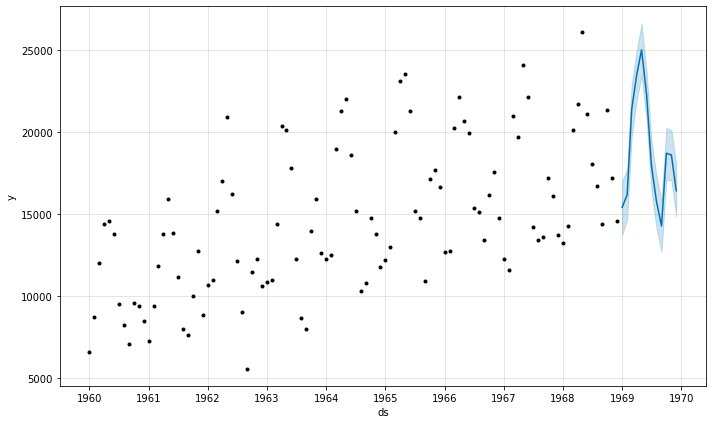

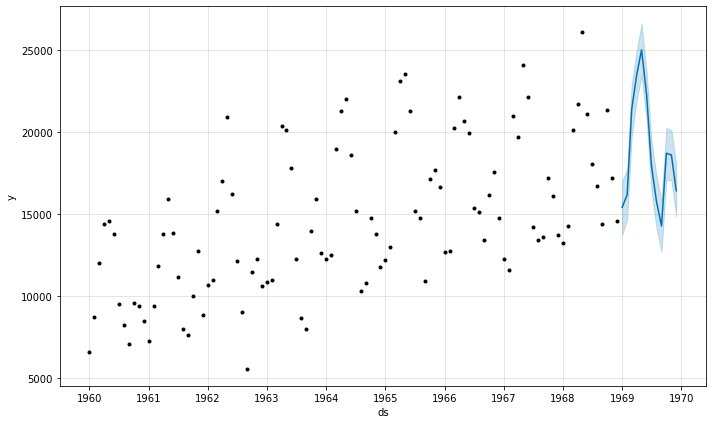

In [15]:
model.plot(forecast)